In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import datetime
rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
#cost = tf.losses.huber_loss(labels=Y,predictions=pred)/(n_samples)
#implementation of huber loss


# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.132010445 W= 0.11883279 b= 1.7421501
Epoch: 0100 cost= 0.125671387 W= 0.12660977 b= 1.686203
Epoch: 0150 cost= 0.120063193 W= 0.13392437 b= 1.6335824
Epoch: 0200 cost= 0.115101643 W= 0.14080396 b= 1.5840911
Epoch: 0250 cost= 0.110712394 W= 0.147274 b= 1.5375463
Epoch: 0300 cost= 0.106829315 W= 0.15335904 b= 1.4937712
Epoch: 0350 cost= 0.103393748 W= 0.15908237 b= 1.4525981
Epoch: 0400 cost= 0.100354046 W= 0.16446552 b= 1.4138719
Epoch: 0450 cost= 0.097664744 W= 0.16952842 b= 1.3774493
Epoch: 0500 cost= 0.095285304 W= 0.17429057 b= 1.3431914
Epoch: 0550 cost= 0.093180157 W= 0.17876922 b= 1.310972
Epoch: 0600 cost= 0.091317512 W= 0.18298166 b= 1.2806678
Epoch: 0650 cost= 0.089669406 W= 0.18694383 b= 1.252164
Epoch: 0700 cost= 0.088211268 W= 0.19067019 b= 1.2253573
Epoch: 0750 cost= 0.086921401 W= 0.19417422 b= 1.2001499
Epoch: 0800 cost= 0.085779972 W= 0.19746998 b= 1.1764402
Epoch: 0850 cost= 0.084770046 W= 0.20056969 b= 1.154141
Epoch: 0900 cost= 0.083876364 W= 0.20

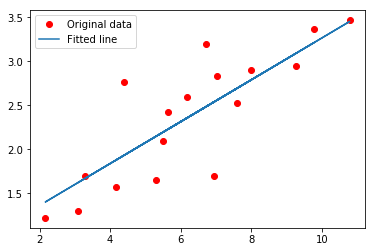

Execution time=  0:00:11.808030 



In [9]:
# Launch the graph
starttime = datetime.datetime.now()
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
endtime = datetime.datetime.now()
print "Execution time= ", endtime-starttime , '\n'

In [10]:
# Regression result
#Execution time=  0:00:06.027553 
#Execution time=  0:00:10.060598 

#Training cost= 0.08181506 W= 0.28861576 b= 0.5207436 


#Execution time=  0:00:05.853682 
#Optimization Finished!
#Training cost= 0.0046252967 W= 0.2724383 b= 0.6371231 

Optimization Finished!
Training cost= 0.12481513 W= 0.37195432 b= -0.078787886 


Execution time=  0:00:03.036270 

Optimization Finished!
Training cost= 0.006626141 W= 0.35551193 b= 0.034211658 

2000 huber

Optimization Finished!
Training cost= 0.0045304666 W= 0.2469067 b= 0.82079566 


Execution time=  0:00:19.591783 

2000 normal
Optimization Finished!
Training cost= 0.077467754 W= 0.23762742 b= 0.88755 



